# RBF Networks 1

In this notebook radial basis networks are used to approximate periodic functions.

In [1]:
import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.rbf_network import *

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


# Create Input Functions

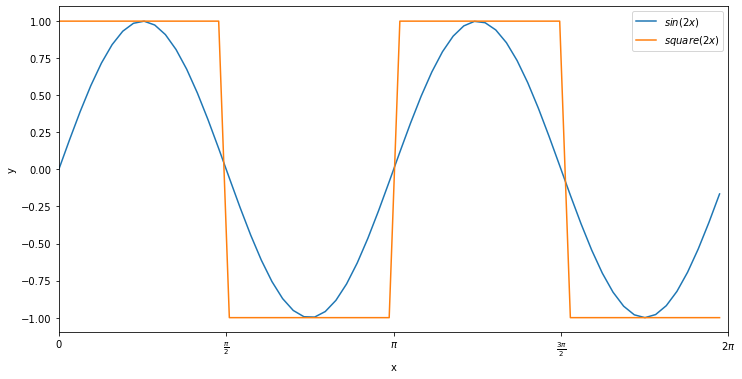

In [2]:
dataset_sin, dataset_square = create_test_dataset()

plt.savefig('../figures/rbf_sin_square.svg')

# Residual Error for Varying Number of Units

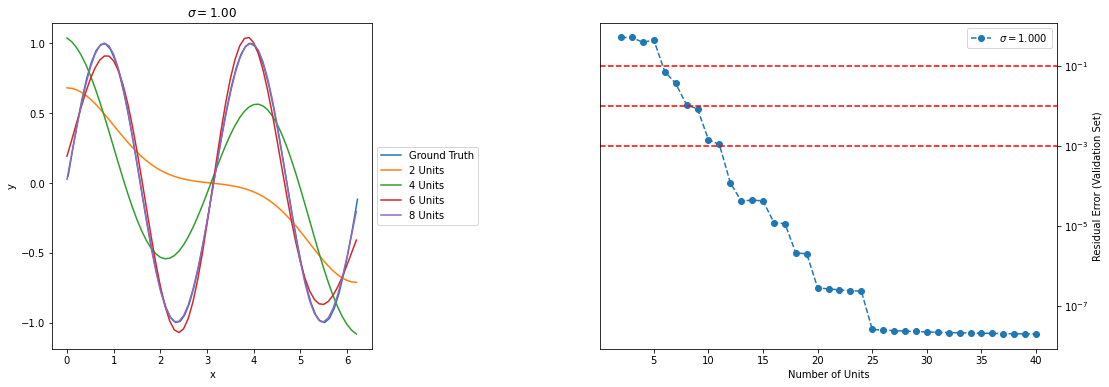

In [3]:
profile_networks(dataset_sin,
                 nodes_profile=range(2, 41),
                 nodes_preview=[2, 4, 6, 8])

plt.savefig('../figures/rbf_residuals_sin.svg')

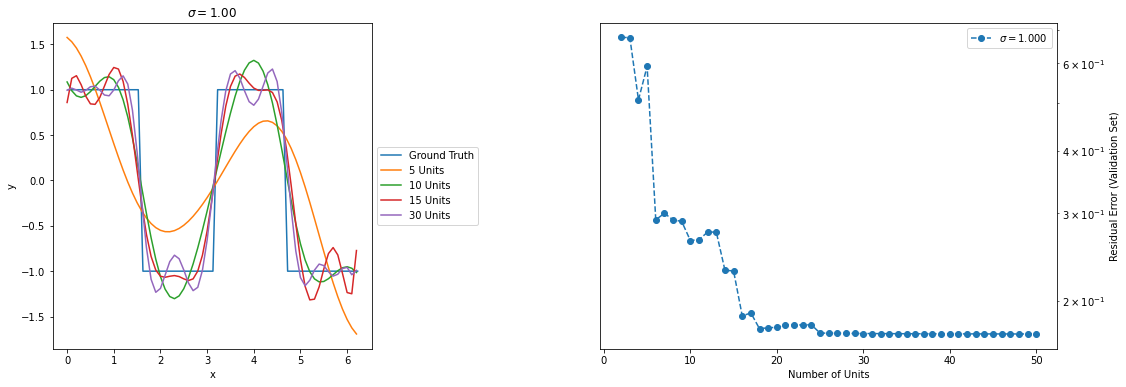

In [4]:
profile_networks(dataset_square,
                 nodes_profile=range(2, 51),
                 nodes_preview=[5, 10, 15, 30])

plt.savefig('../figures/rbf_residuals_square.svg')

# Output Transform Performance Improvements

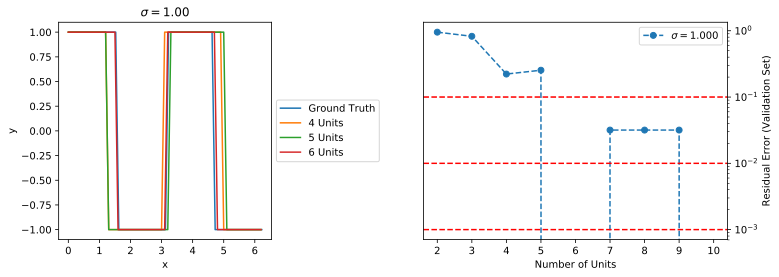

In [5]:
profile_networks(dataset_square,
                 nodes_profile=range(2, 11),
                 nodes_preview=[4, 5, 6],
                 kwargs_network={'postprocessing': lambda pred: np.sign(pred)})

plt.savefig('../figures/rbf_residuals_square_thresh.svg')

# Find Optimal RBF Network

In [9]:
nodes, node_std, res_min = rbf_network_gridsearch(
    dataset_sin,
    kwargs_network={
        'nodes': range(10, 31),
        'node_std': np.arange(0.1, 10, 0.1)},
    thresh_div=2
)

fmt = "Best RBF network has {} units with standard deviation {:1.2f} (and residual {:1.2e})"
print(fmt.format(nodes, node_std, res_min))

Best RBF network has 18 units with standard deviation 1.30 (and residual 2.15e-08)
